In [40]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [41]:
df = pd.read_csv('titanic.csv')

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# importing in-built dataset
df1 = sns.load_dataset('titanic')

In [44]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
df1.drop(['alive','class','who','fare','embarked','adult_male','alone'],axis=1,inplace=True)

In [46]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,deck,embark_town
0,0,3,male,22.0,1,0,NaN,Southampton
1,1,1,female,38.0,1,0,C,Cherbourg
2,1,3,female,26.0,0,0,NaN,Southampton
3,1,1,female,35.0,1,0,C,Southampton
4,0,3,male,35.0,0,0,NaN,Southampton


In [47]:
#missing data
df1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
deck           688
embark_town      2
dtype: int64

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   deck         203 non-null    category
 7   embark_town  889 non-null    object  
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 50.1+ KB


In [49]:
# deck - 77.12% missing data
# age - 19.86%
# embark_town - 0.22%

In [50]:
df1.drop('deck',axis=1,inplace=True)

In [51]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,embark_town
0,0,3,male,22.0,1,0,Southampton
1,1,1,female,38.0,1,0,Cherbourg
2,1,3,female,26.0,0,0,Southampton
3,1,1,female,35.0,1,0,Southampton
4,0,3,male,35.0,0,0,Southampton


In [52]:
df1.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
embark_town      2
dtype: int64

<AxesSubplot:ylabel='age'>

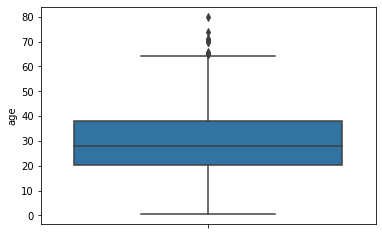

In [53]:
# age is number (mean / median) , lets check outlier , ......................................
sns.boxplot(y='age',data=df1)

In [54]:
# lets go with median
print(df1['age'].mean())
print(df1['age'].median())

29.69911764705882
28.0


In [55]:
# not much diff , so we can go with median for safer side

In [56]:
df1['age']=df1['age'].fillna(df1['age'].median())

In [57]:
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
embark_town    2
dtype: int64

In [58]:
# embark_town - char - lets go with mode
df1['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [59]:
df1['embark_town']=df1['embark_town'].fillna('Southampton')

In [60]:
df1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
embark_town    0
dtype: int64

In [61]:
df1

,survived,pclass,sex,age,sibsp,parch,embark_town
0,0,3,male,22.0,1,0,Southampton
1,1,1,female,38.0,1,0,Cherbourg
2,1,3,female,26.0,0,0,Southampton
3,1,1,female,35.0,1,0,Southampton
4,0,3,male,35.0,0,0,Southampton
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,Southampton
887,1,1,female,19.0,0,0,Southampton
888,0,3,female,28.0,1,2,Southampton
889,1,1,male,26.0,0,0,Cherbourg


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   embark_town  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [63]:
df1['sex']=df1['sex'].astype('category')
df1['sex']=df1['sex'].cat.codes
df1 = pd.get_dummies(df1,columns=['sex'])

In [64]:
df1['embark_town']=df1['embark_town'].astype('category')
df1['embark_town']=df1['embark_town'].cat.codes
df1 = pd.get_dummies(df1,columns=['embark_town'])

In [65]:
df1.head()

,survived,pclass,age,sibsp,parch,sex_0,sex_1,embark_town_0,embark_town_1,embark_town_2
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [66]:
df1.drop(['sex_0','embark_town_0'],axis=1,inplace=True)

In [67]:
df1.head()

,survived,pclass,age,sibsp,parch,sex_1,embark_town_1,embark_town_2
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [68]:
# check class inbalance # no call inbalance
df1['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [69]:
x = df1.drop(['survived'],axis=1)
y = df1['survived']

In [70]:
x

,pclass,age,sibsp,parch,sex_1,embark_town_1,embark_town_2
0,3,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,3,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,3,35.0,0,0,1,0,1
...,...,...,...,...,...,...,...
886,2,27.0,0,0,1,0,1
887,1,19.0,0,0,0,0,1
888,3,28.0,1,2,0,0,1
889,1,26.0,0,0,1,0,0


In [71]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75,random_state = 101)

In [73]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_train_pred = logit.predict(x_train)
y_test_pred = logit.predict(x_test)

In [76]:
logit.coef_

array([[-1.12588927, -0.04093016, -0.29118002, -0.02703648, -2.62413982,
        -0.01873155, -0.41845201]])

In [77]:
logit.intercept_

array([5.23808168])

In [81]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [83]:
print(confusion_matrix(y_train,y_train_pred))
print(confusion_matrix(y_test,y_test_pred))

[[368  54]
 [ 70 176]]
[[112  15]
 [ 33  63]]


In [84]:
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       422
           1       0.77      0.72      0.74       246

    accuracy                           0.81       668
   macro avg       0.80      0.79      0.80       668
weighted avg       0.81      0.81      0.81       668

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       127
           1       0.81      0.66      0.72        96

    accuracy                           0.78       223
   macro avg       0.79      0.77      0.77       223
weighted avg       0.79      0.78      0.78       223



In [85]:
print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.8143712574850299
0.7847533632286996


In [94]:
#### this project ends here

In [93]:
#### just trying LinearRegression

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [88]:
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

In [90]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sf

In [91]:
reg_model = sf.OLS(endog=y_train, exog= x_train).fit()
reg_model

In [92]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               survived   R-squared (uncentered):                   0.425
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              69.67
Date:                Wed, 23 Mar 2022   Prob (F-statistic):                    3.44e-75
Time:                        14:46:45   Log-Likelihood:                         -429.63
No. Observations:                 668   AIC:                                      873.3
Df Residuals:                     661   BIC:                                      904.8
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
pclass            0.0770      0.018      4.232      0.000       0.041       0.113
age               0.0107      0.001      9.832      0.000       0.009       0.013
sibsp            -0.0110      0.017     -0.641      0.522      -0.045       0.023
parch             0.0564      0.024      2.363      0.018       0.010       0.103
sex_1            -0.4340      0.039    -11.065      0.000      -0.511      -0.357
embark_town_1     0.0826      0.077      1.069      0.285      -0.069       0.234
embark_town_2     0.1134      0.046      2.461      0.014       0.023       0.204
==============================================================================
Omnibus:                       33.352   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.985
Skew:                           0.455   Prob(JB):                     3.08e-07
Kurtosis:                       2.501   Cond. No.                         147.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
print(accuracy_score(y_train,y_train_pred_lr))
print(accuracy_score(y_test,y_test_pred_lr))

ValueError: Classification metrics can't handle a mix of binary and continuous targets